# Importing Libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Reading the Data from the CSV file

In [29]:
diabetes_df = pd.read_csv("D:\Projects\Diabetes Prediction\diabetes.csv")


In [63]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis(EDA)

In [62]:
# total number of columns in the dataset
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [61]:
# Information about the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [60]:
# To know more about the dataset
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# To know more about the dataset with Transpose to view all columns vertically
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [59]:
# Checking if there is some null values or not where 'False' indicates No Missing value
diabetes_df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [58]:
# Checking if there is some null values or not with the sum of Null values
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [57]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# Visualizing the Data

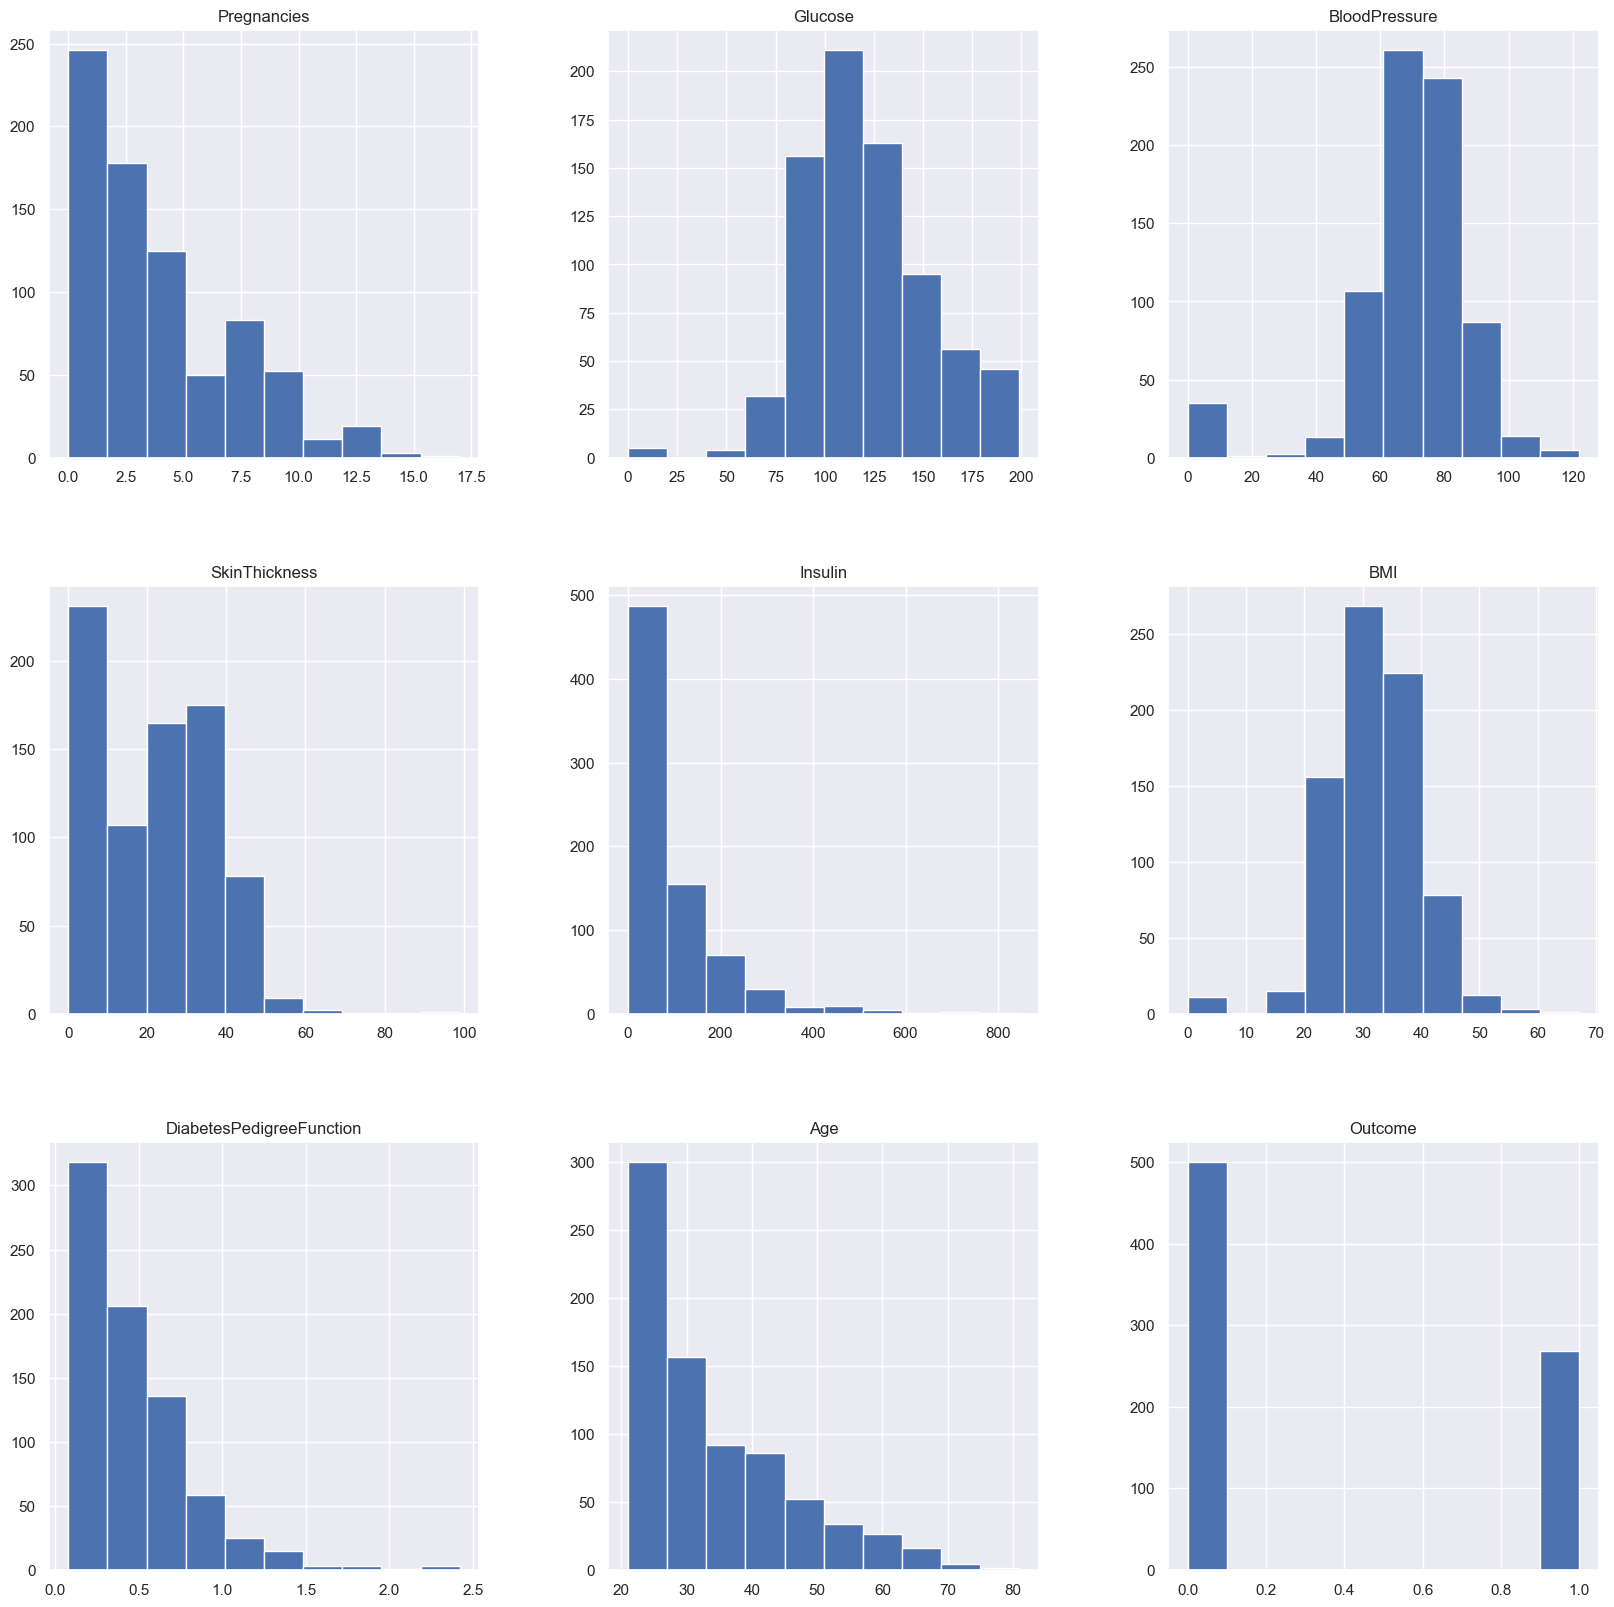

In [52]:
# Plotting the data distribution plots
p = diabetes_df.hist(figsize = (20,20))
plt.show()

In [53]:
# Need to input NAN values for the columns in accordance with their distribution
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].mean(), inplace = True)

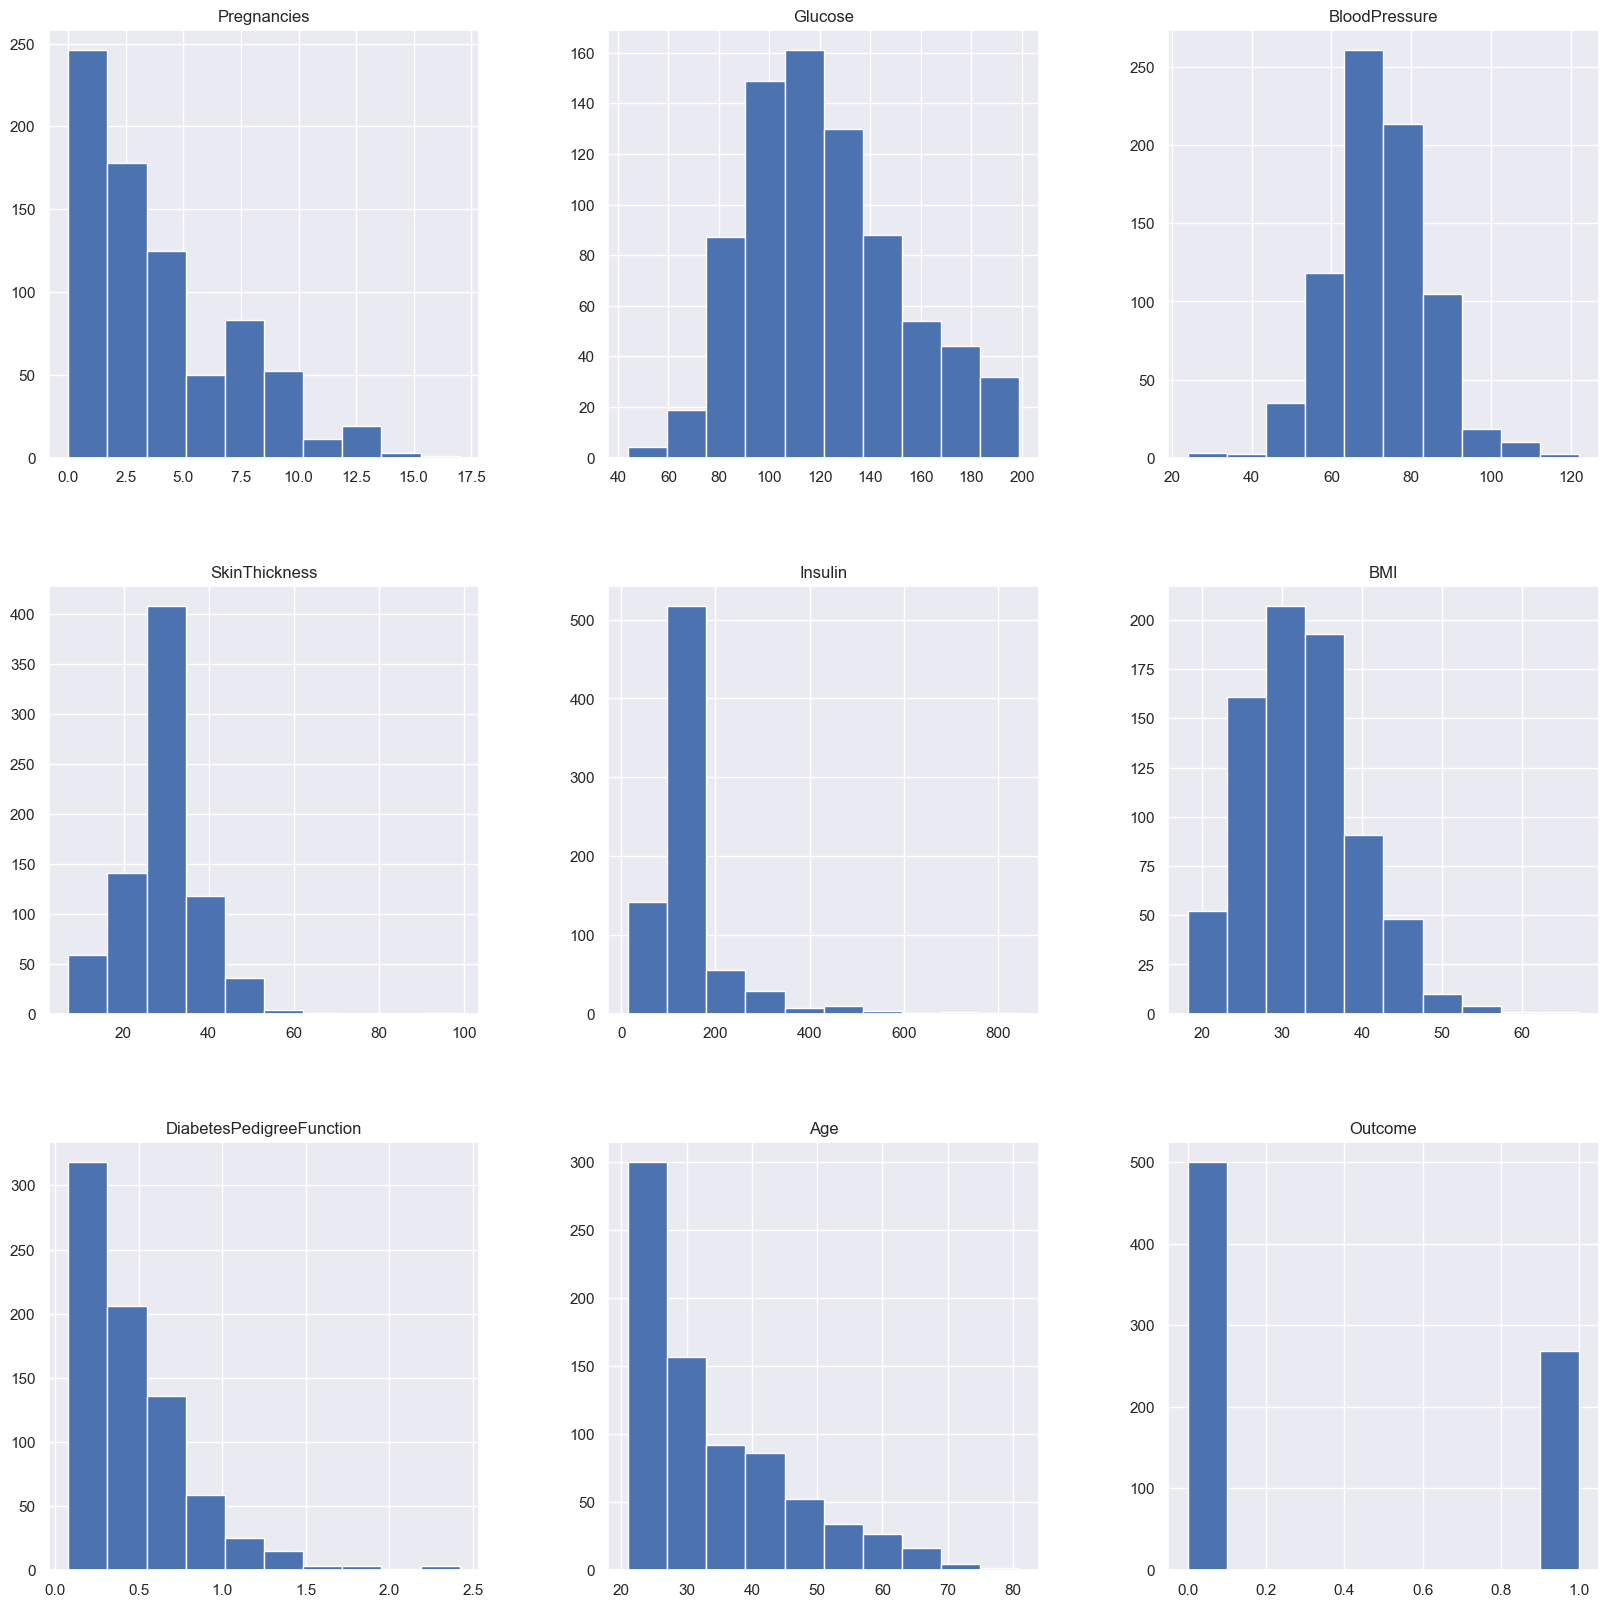

In [54]:
# Plotting the data distribution again after replacing the NAN values with the column's Mean/Median
p = diabetes_df_copy.hist(figsize = (20,20))
plt.show()

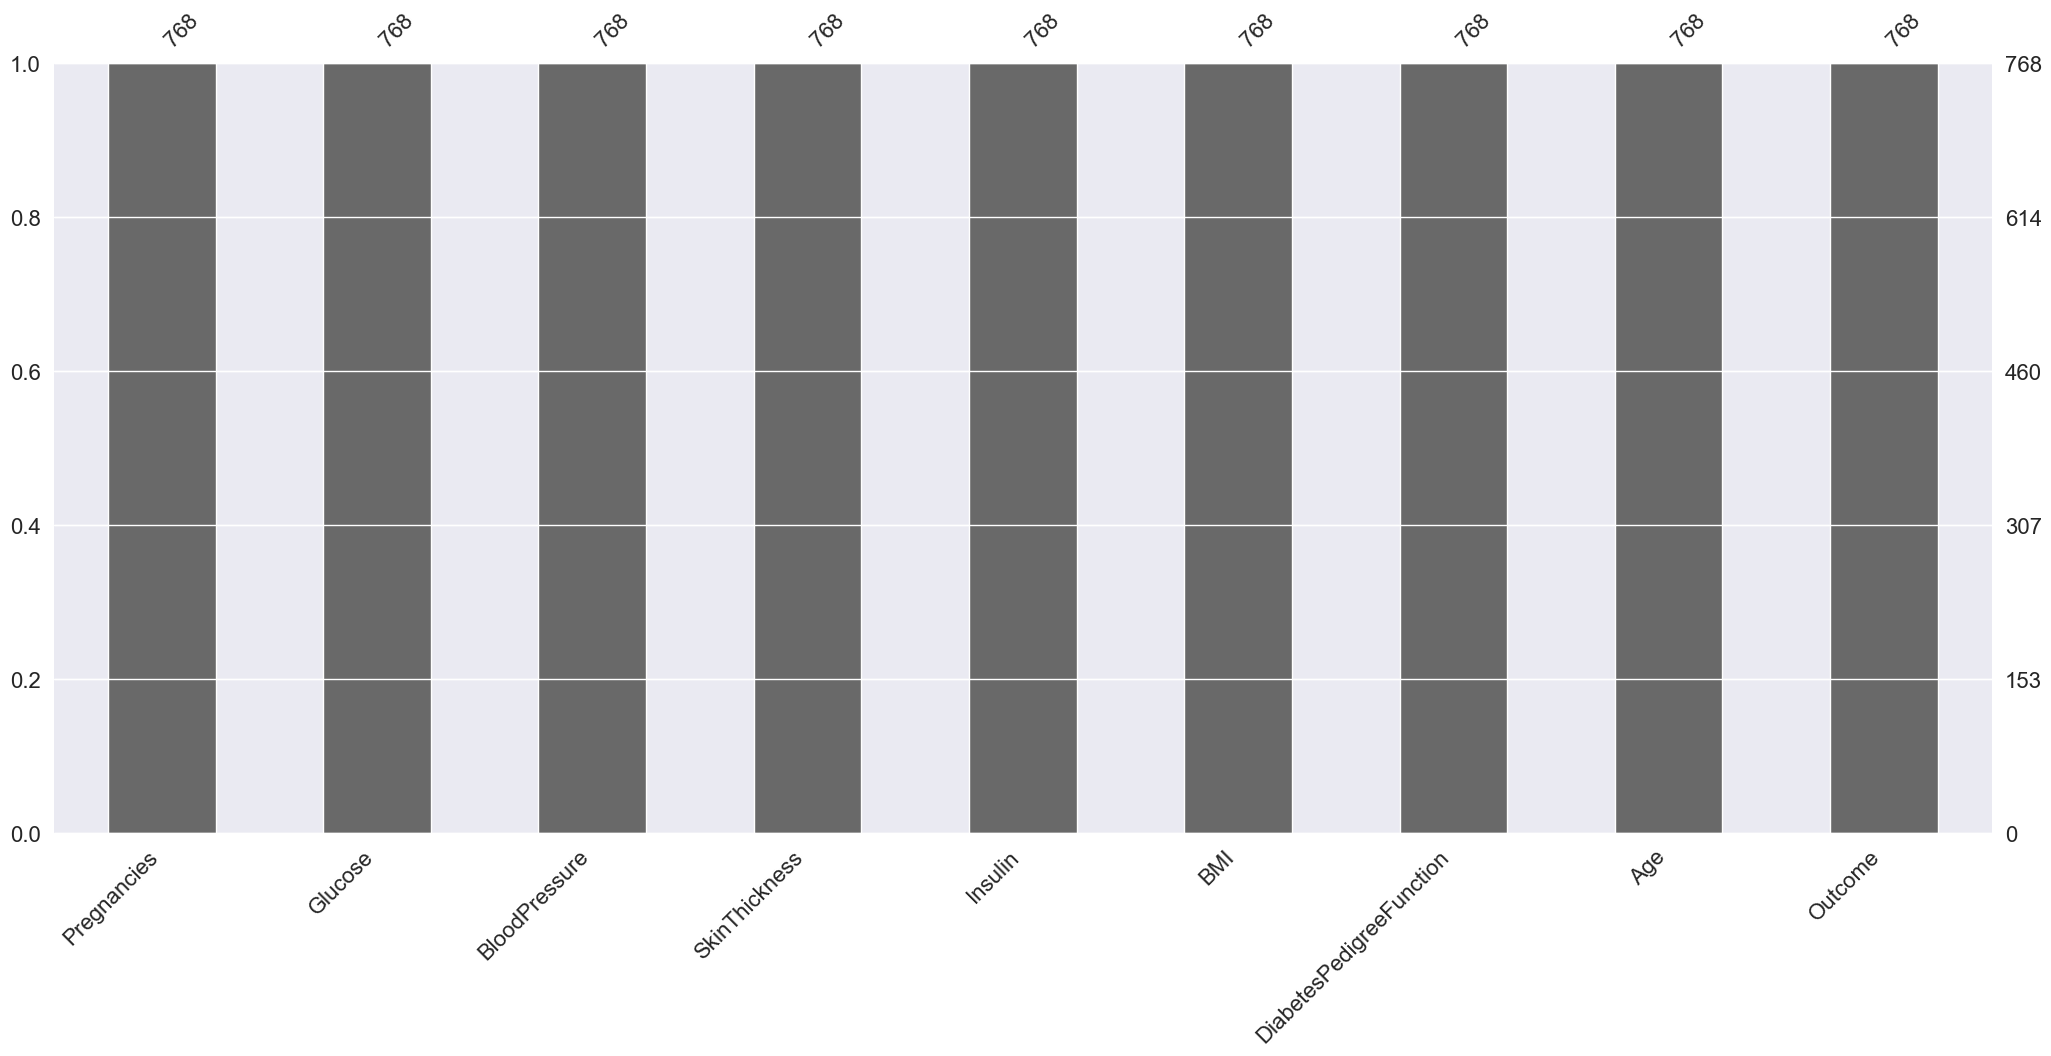

In [55]:
# Plotting the Null count analysis of the Plot
p = msno.bar(diabetes_df)
plt.show()

Outcome
0    500
1    268
Name: count, dtype: int64


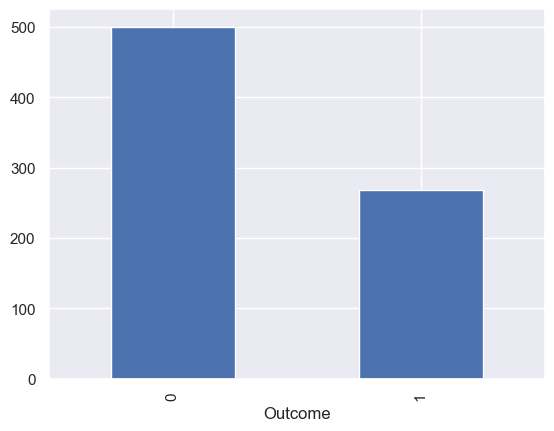

In [75]:
# Checking the balance of the data by plotting the count of outcomes by their value counts

color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")
plt.show()

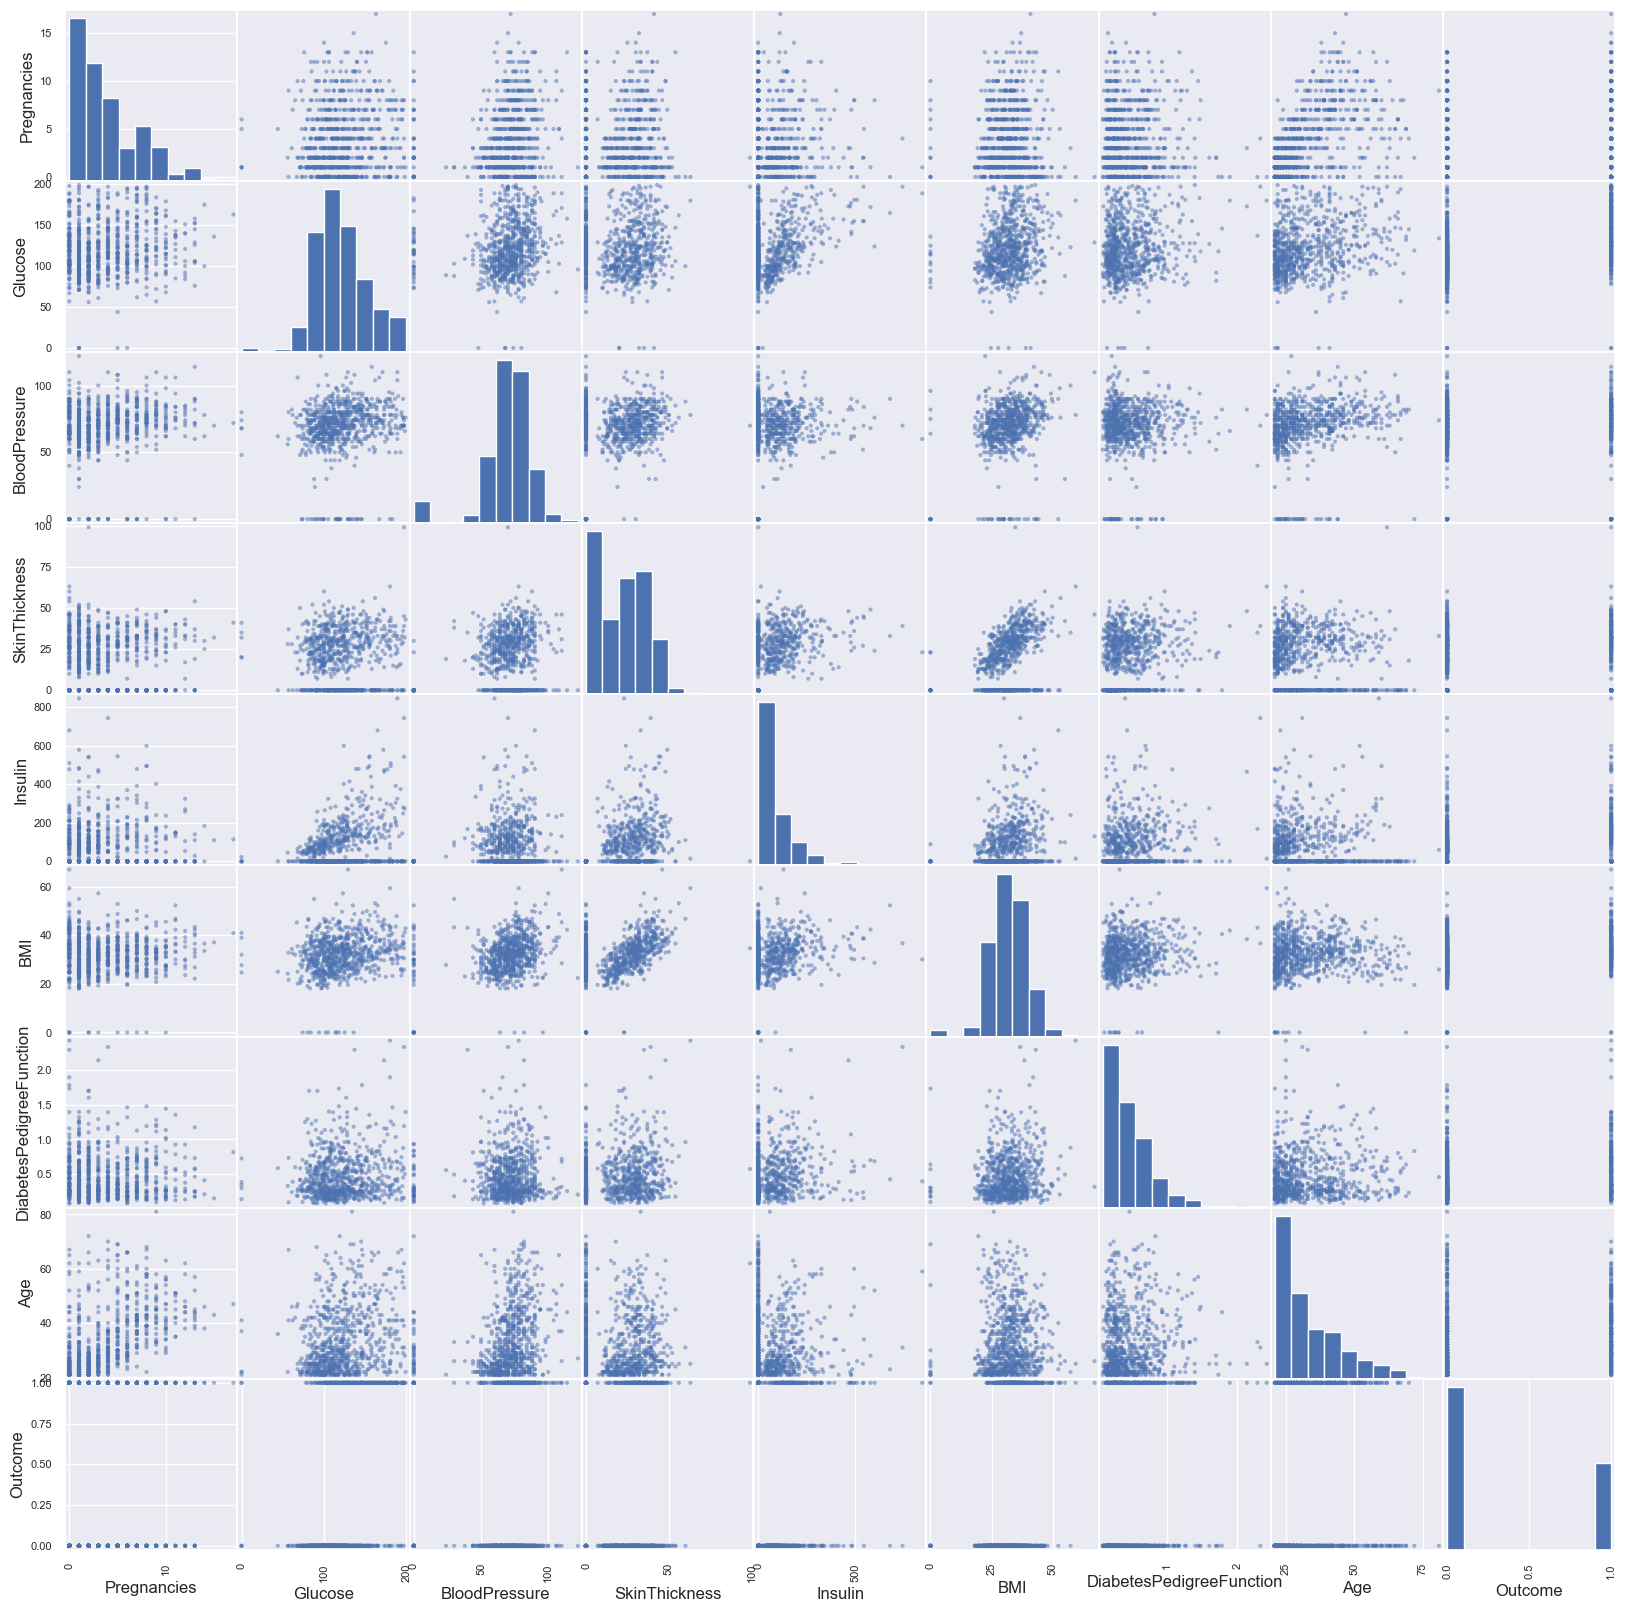

In [66]:
# Plotting a Scatter matrix of uncleaned data
p= scatter_matrix(diabetes_df, figsize=(20,20))
plt.show()

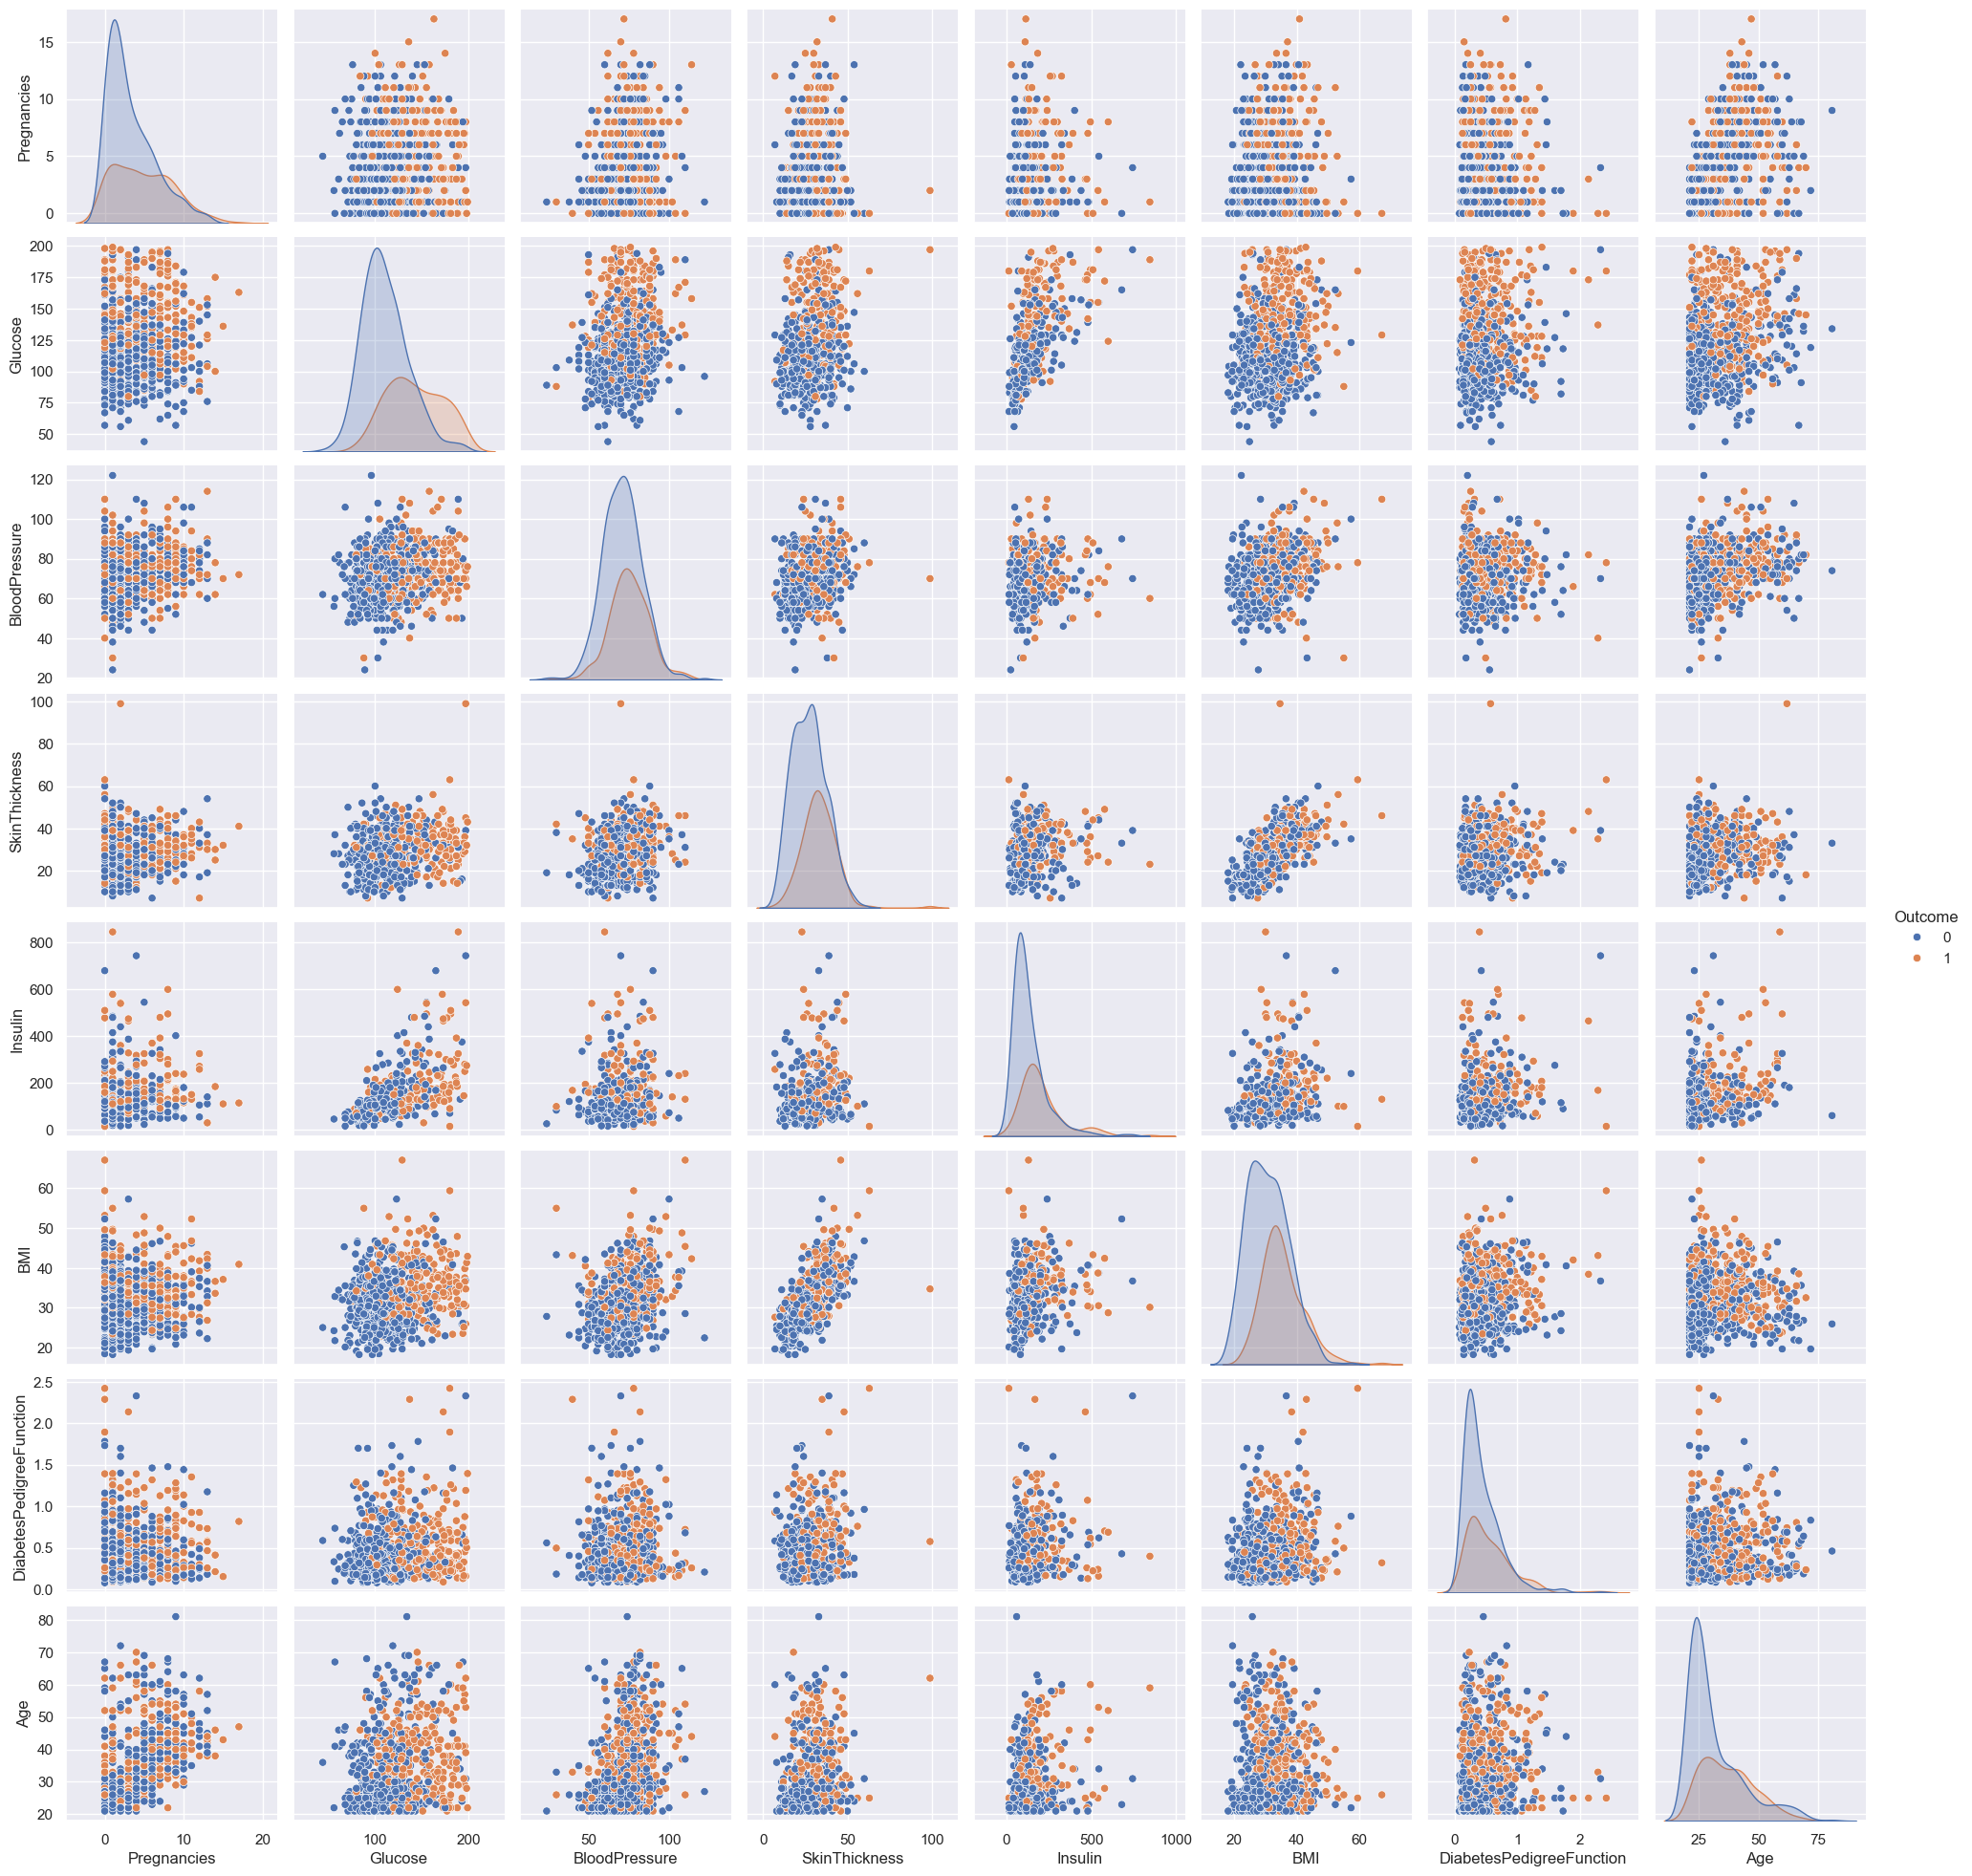

In [70]:
# Plotting the pair plots for the data
p= sns.pairplot(diabetes_df_copy, hue = 'Outcome')
plt.show()

# Correlation Between the features

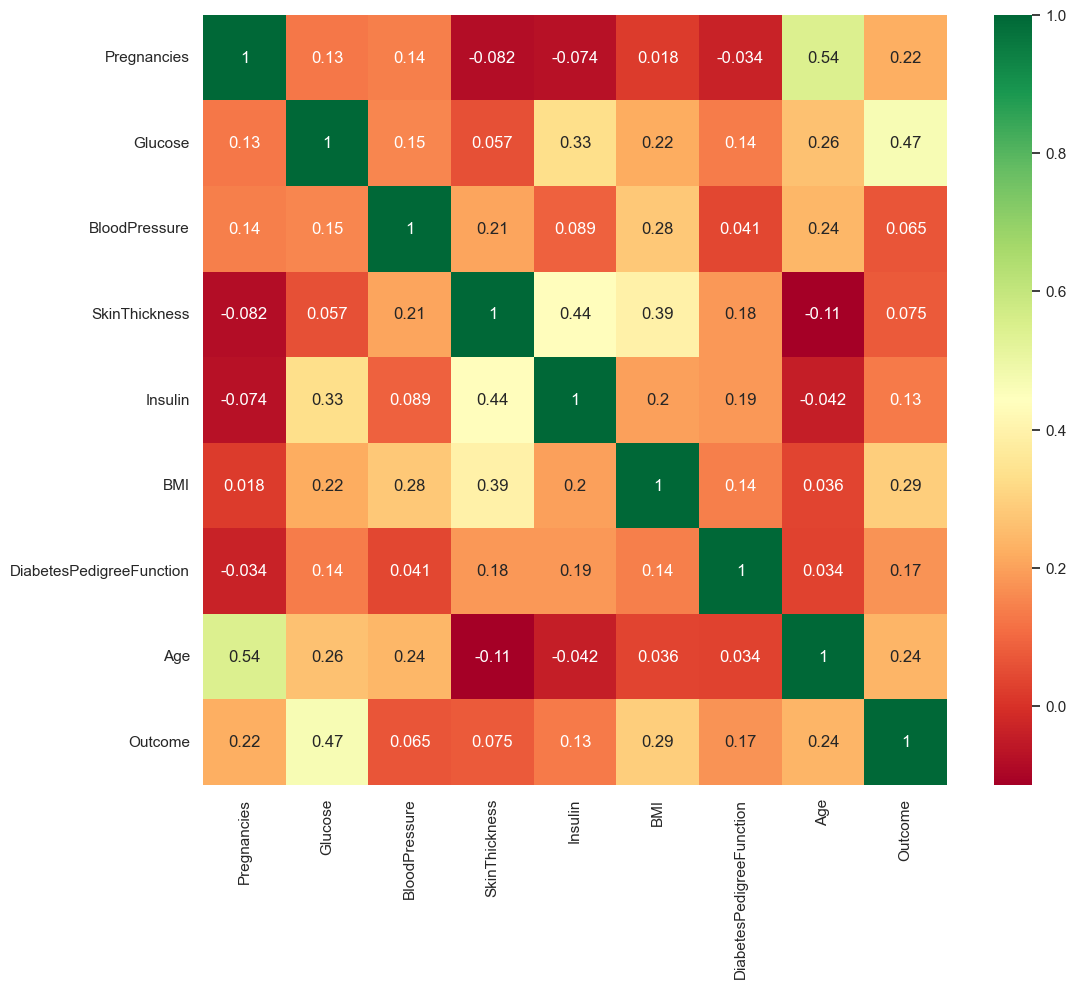

In [80]:
# Correlation between all the features before cleaning
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df.corr(), annot= True, cmap = 'RdYlGn')
plt.show()

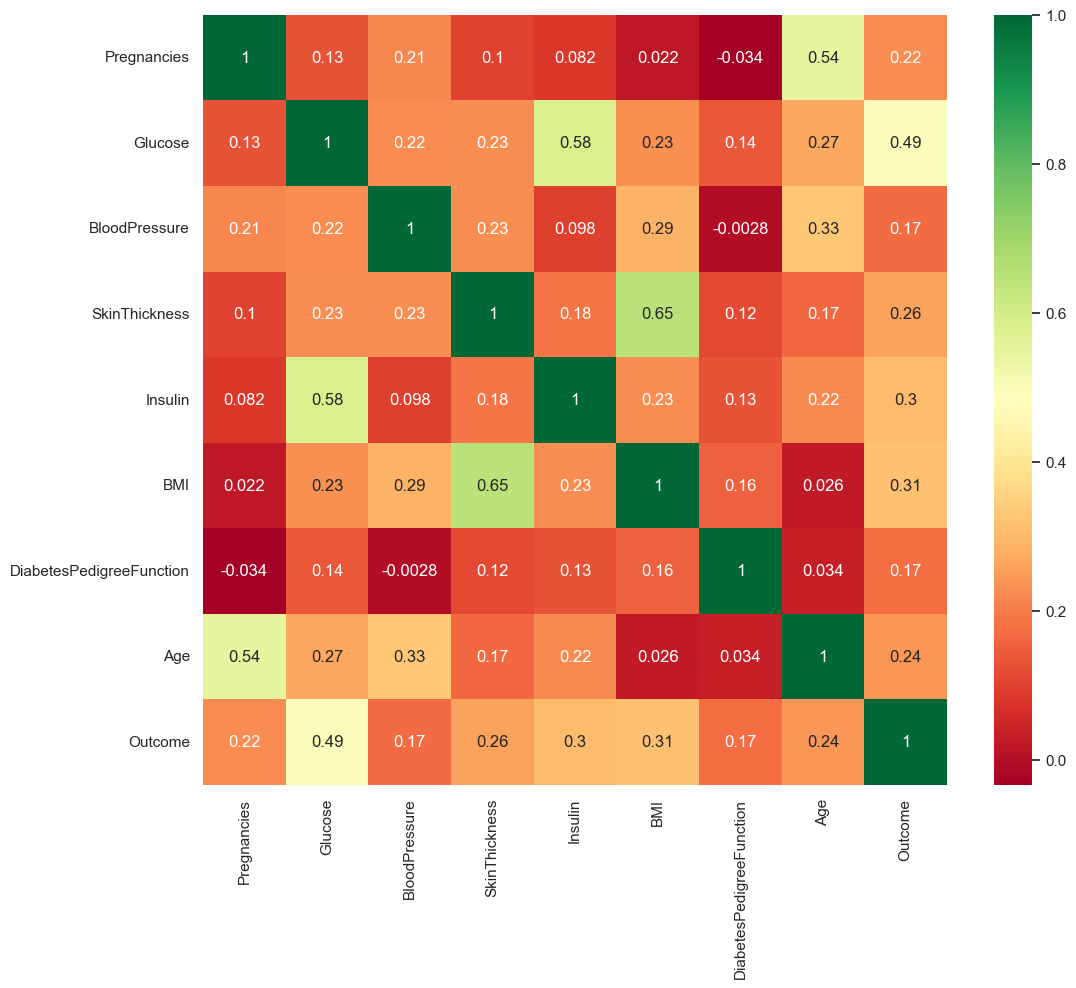

In [81]:
# correlation between all the features after cleaning
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df_copy.corr(), annot= True, cmap = 'RdYlGn')
plt.show()

# Scaling the Data

In [83]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [86]:
sc_x = StandardScaler()
D = pd.DataFrame(sc_x.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
D.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.862287,-0.032746,0.558557,NaN,0.165097,0.468492,1.425995
1,-0.844885,-1.202229,-0.517645,-0.014657,NaN,-0.846404,-0.365061,-0.190672
2,1.233880,2.009241,-0.679278,NaN,NaN,-1.323254,0.604397,-0.105584
3,-0.844885,-1.071148,-0.517645,-0.587871,-0.518847,-0.629654,-0.920763,-1.041549
4,-1.141852,0.501816,-2.618874,0.558557,0.104968,1.537847,5.484909,-0.020496


In [91]:
dc = diabetes_df_copy.Outcome

In [92]:
dc

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Splitting the Data into Train and Test

In [93]:
D_train,D_test,dc_train,dc_test = train_test_split(D,dc,test_size = 1/3, random_state = 42, stratify = dc)

In [94]:
D_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
657,-0.844885,-0.055275,0.613787,1.800521,0.374725,0.930947,2.084255,0.660206
462,1.233880,-1.562700,-0.194379,1.036235,-0.898193,0.410747,0.704061,0.490030
171,0.639947,0.403506,-0.194379,-0.587871,-0.215370,0.425197,0.211782,-0.360847
210,-0.547919,-1.333309,-1.002544,-0.683407,NaN,-0.687454,-0.549288,-0.701198
147,-0.547919,-0.514057,-0.679278,0.558557,-0.308099,-0.282854,2.803044,0.064591
...,...,...,...,...,...,...,...,...
113,0.046014,-1.497160,-0.840911,NaN,NaN,0.222897,-0.244256,-0.701198
556,-0.844885,-0.808988,-0.194379,1.036235,NaN,0.815347,-0.766737,-0.275760
254,2.421746,-0.972838,-0.840911,-2.116442,0.863661,-0.701904,1.371507,0.915469
647,-1.141852,1.878160,-1.810709,0.654093,0.029098,0.771997,-0.050968,-0.956462


In [95]:
D_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
52,0.342981,-1.103919,-0.517645,-0.778942,-1.117371,-1.164304,-0.392242,-0.275760
64,0.936914,-0.251896,-0.517645,NaN,NaN,0.049497,-0.645932,0.745293
630,0.936914,-0.251896,-0.679278,NaN,NaN,-0.730804,0.785604,0.064591
707,-0.547919,0.174115,-2.133975,-0.778942,1.512765,0.280697,-0.893582,-0.956462
330,1.233880,-0.120816,-0.032746,-0.970014,NaN,-1.352154,3.032573,1.085644
...,...,...,...,...,...,...,...,...
33,0.639947,-0.972838,1.583585,NaN,NaN,-1.814554,-0.857340,-0.445935
596,-1.141852,-1.792091,0.290520,NaN,NaN,1.855747,-0.839219,1.085644
88,3.312645,0.469046,-0.194379,0.271950,-0.383968,0.670847,-0.963044,0.830381
679,-0.547919,-0.677907,-1.164177,-1.161085,0.922670,-1.193204,0.429230,-0.871374


In [96]:
dc_train

657    0
462    0
171    1
210    0
147    0
      ..
113    0
556    0
254    1
647    1
107    0
Name: Outcome, Length: 512, dtype: int64

In [97]:
dc_test

52     0
64     1
630    1
707    0
330    0
      ..
33     0
596    0
88     1
679    0
112    0
Name: Outcome, Length: 256, dtype: int64

# 